In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Classifier:
    def __init__(self):
        self.wa1 = 5.9760 / 100
        self.wa2 = 10.5620 / 100
        self.wa3 = 12.8426 / 100
        self.wn1 = 9.8834 / 100
        self.wn2 = 7.2051 / 100
        self.wn3 = 3.1471 / 100
        self.wg1 = 8.3630 / 100
        self.wg2 = 3.9262 / 100
        self.wg3 = 1.3964 / 100
        self.we1 = 1.5622 / 100
        self.we2 = 4.2409 / 100
        self.we3 = 7.4030 / 100
        self.wl1 = 2.1028 / 100
        self.wl2 = 1.7318 / 100
        self.wl3 = 4.2508 / 100
        self.ws1 = 4.1006 / 100
        self.ws2 = 4.6387 / 100
        self.ws3 = 6.6674 / 100
    
    def action(self, row):
        a = 0

        age = row['age']
        if age >= 100:
            a1 = 1
        elif age < 100:
            a1 = (age-65)/35
        else:
            raise ValueError(f'Invalid value for age: {age}')

        d_lv = row['disability_lv']
        if d_lv == 5:
            a2 = 1
            a3 = 1
        elif d_lv == 4:
            a2 = 1
            a3 = 2/3
        elif d_lv == 3:
            a2 = 0.9878
            a3 = 1/3
        elif d_lv in [2, 1, 0]:
            a2 = 0
            a3 = 0
        elif d_lv == 'NA' or pd.isna(d_lv):
            a2 = 0
            a3 = 0
        else:
            raise ValueError(f'Invalid value for disability_lv: {d_lv}')

        a = self.wa1*a1 + self.wa2*a2 + self.wa3*a3
        return a
    
    def nurse(self, row):
        n = 0

        f_type = row['family_type']
        if f_type == 1:
            n1 = 1
        elif f_type == 2:
            n1 = 0.6128
        elif f_type == 3:
            n1 = 0
        else:
            raise ValueError(f'Invalid value for family_type: {f_type}')
        
        c_cnt = row['child_cnt']
        is_same_county = row['is_living_same_county']
        if c_cnt == 0:
            n2 = 1
        elif c_cnt >= 1:
            if is_same_county == 0:
                n2 = 0.6326
            elif is_same_county == 1:
                n2 = 0
            else:
                raise ValueError(f'Invalid value for is_living_same_county: {is_same_county}')
        else:
            raise ValueError(f'Invalid value for child_cnt: {c_cnt}')

        n3 = 0

        n = self.wn1*n1 + self.wn2*n2 + self.wn3*n3
        return n
    
    def gold(self, row):
        g = 0

        low_type = row['low_type_cd']
        if low_type == 0:
            g1 = 1
        elif low_type == 1:
            g1 = 5/6
        elif low_type == 2:
            g1 = 4/6
        elif low_type == 3:
            g1 = 3/6
        elif low_type == 4:
            g1 = 2/6
        elif low_type == 5:
            g1 = 1/6
        elif low_type == 99:
            g1 = 0
        else:
            raise ValueError(f'Invalid value for low_type_cd: {low_type}')

        house_type = row['having_house_type']
        if house_type in [1, 2, 3, 4, 5]:
            g2 = 0
        elif house_type == 6:
            g2 = 0.1747
        elif house_type == 7:
            g2 = 1
        else:
            raise ValueError(f'Invalid value for having_house_type: {house_type}')

        g3 = 0.5840

        g = self.wg1*g1 + self.wg2*g2 + self.wg3*g3
        return g
    
    def entity(self, row):
        e = 0

        build_age = row['build_age']
        if build_age >= 50:
            e1 = 1
        elif build_age < 30:
            e1 = 0
        elif build_age >= 30 and build_age < 50:
            e1 = (build_age-30)/20
        else:
            build_age = 34
            e1 = (build_age-30)/20

        is_apartment = row['is_apartment']
        if is_apartment == 0:
            e2 = 0
        elif is_apartment in [2, 3, 4, 5]:
            e2 = 1
        elif is_apartment == 99:
            e2 = 0.1815
        else:
            raise ValueError(f'Invalid value for is_apartment: {is_apartment}')

        e3 = 0.4147

        e = self.we1*e1 + self.we2*e2 + self.we3*e3
        return e
    
    def liberty(self, row):
        l = 0

        bus = row['bus']
        if bus == 1:
            l1 = 1
        elif bus in [0.8, 0.6, 0.4, 0.2, 0, -1]:
            l1 = 0
        else:
            raise ValueError(f'Invalid value for bus: {bus}')

        store = row['store']
        if store == 1:
            l2 = 1
        elif store in [0.8, 0.6, 0.4, 0.2, 0, -1]:
            l2 = 0
        else:
            raise ValueError(f'Invalid value for store: {store}')

        hospital = row['hospital']
        if hospital == 1:
            l3 = 1
        elif hospital in [0.8, 0.6, 0.4, 0.2, 0, -1]:
            l3 = 0
        else:
            raise ValueError(f'Invalid value for hospital: {hospital}')
        
        l = self.wl1*l1 + self.wl2*l2 + self.wl3*l3
        return l
    
    def security(self, row):
        lique = row['lique']
        if lique == 0:
            s1 = 0
        elif lique == 1:
            s1 = 1/3
        elif lique == 2:
            s1 = 2/3
        elif lique == 3:
            s1 = 1
        elif lique == 4:
            s1 = 0
        else:
            raise ValueError(f'Invalid value for lique: {lique}')

        s2 = 0
        s3 = 0

        s = self.ws1*s1 + self.ws2*s2 + self.ws3*s3
        return s
    
    def apply_class(self, data):
        data['action'] = data.apply(self.action, axis=1)
        data['nurse'] = data.apply(self.nurse, axis=1)
        data['gold'] = data.apply(self.gold, axis=1)
        data['entity'] = data.apply(self.entity, axis=1)
        data['liberty'] = data.apply(self.liberty, axis=1)
        data['security'] = data.apply(self.security, axis=1)
        data['overall'] = data['action'] + data['nurse'] + data['gold'] + data['entity'] + data['liberty'] + data['security']

        result = data[['person_sn', 'is_use_long_term_care',
                          'action', 'nurse', 'gold', 'entity', 'liberty', 'security', 'overall']]
        print('Classification completed.')
        return result

    def apply_overall(self, data):
        data['new_overall'] = data['action'] + data['nurse'] + data['gold'] + data['entity'] + data['liberty'] + data['security']
        result = data[['person_sn', 'is_use_long_term_care',
                          'action', 'nurse', 'gold', 'entity', 'liberty', 'security', 'overall', 'new_overall']]
        return result

In [3]:
def data_swapping_with_distribution_control(df, columns, swap_fraction=0.1):
    df_swapped = df.copy()
    num_rows = len(df)
    num_swaps = int(swap_fraction * num_rows)
    
    for col in columns:
        sorted_indices = df[col].sort_values().index
        for i in range(0, num_swaps, 2):
            idx1 = sorted_indices[i]
            idx2 = sorted_indices[i + 1] if (i + 1) < num_rows else sorted_indices[i]
            df_swapped.loc[idx1, col], df_swapped.loc[idx2, col] = df.loc[idx2, col], df.loc[idx1, col]
    
    return df_swapped

In [4]:
data = pd.read_csv('angels_simulation.csv')
data = Classifier().apply_class(data)
data_c = data.copy()
data_c.to_csv('angels_simulation_classified.csv', index=False)

Classification completed.


In [5]:
noise = np.random.uniform(-0.005, 0.005, size=data[['action', 'gold', 'entity']].shape)
data['action'] += noise[:, 0]
data['gold'] += noise[:, 1]
data['entity'] += noise[:, 2]

In [6]:
columns_to_swap = ['action', 'gold', 'entity']
df_swapped_controlled = data_swapping_with_distribution_control(data, columns_to_swap, swap_fraction=0.2)

In [7]:
df_swapped_controlled.drop(columns=['person_sn', 'is_use_long_term_care', 'overall'], inplace=True)
data['overall'] = df_swapped_controlled.sum(axis=1)
data.to_csv('angels_simulation_result.csv', index=False)

In [30]:
def plot_histogram(original_data, modified_data, column_name, bins=30):
    plt.figure(figsize=(8, 6))

    plt.hist(original_data[column_name], bins=bins, color='blue', alpha=0.5, label='Before')
    plt.hist(modified_data[column_name], bins=bins, color='red', alpha=0.5, label='After')
    plt.title(f'Histogram of {column_name.capitalize()} Scores')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


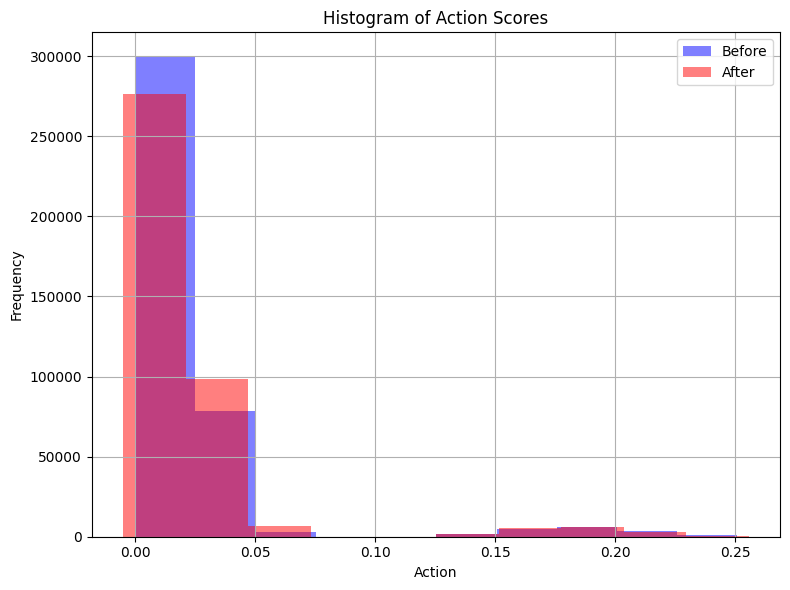

In [31]:
plot_histogram(data_c, data, 'action', bins=10)

In [33]:
crosstab_result = pd.crosstab([data['is_use_long_term_care']], [data['security'], data['liberty']])
crosstab_result.to_csv('crosstab_result.csv', index=True)